# Practical Work 4 

## Students
- Flavia Pittet
- Fabio Vitali

## Exercice 1 - Get the data
- Get ‘lausanne-appart.xlsx’ from moodle
- Open a new iPython notebook
- Read columns 0 (x) and column 2 (y) from the excel file ‘lausanne-appart.xlsx’
- Visualize the data




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_excel('lausanne-appart.xlsx')
x = dataset['Living area (m2)'].values
y = dataset['rent (CHF)'].values

print(x.shape, y.shape)

(201,) (201,)


a) histogram to visualize the distribution of the renting price

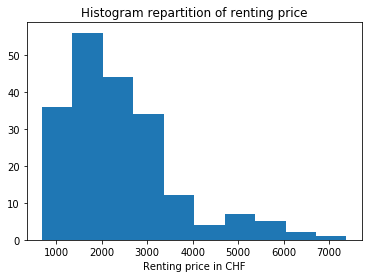

In [3]:
plt.clf()
plt.hist(y)
plt.xlabel('Renting price in CHF')
plt.title('Histogram repartition of renting price')
plt.show()

b) histogram to visualize the distribution of the living area

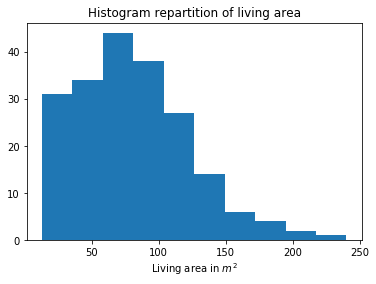

In [4]:
plt.clf()
plt.hist(x)
plt.title('Histogram repartition of living area')
plt.xlabel('Living area in $m^2$')
plt.show()

c) scatter plot of living area as a function of renting price

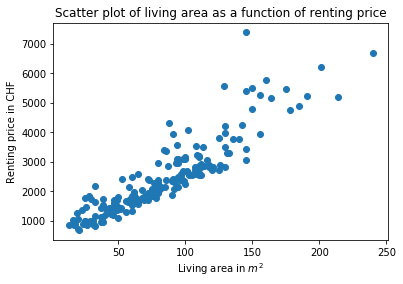

In [5]:
plt.clf()
plt.scatter(x,y)
plt.title('Scatter plot of living area as a function of renting price')
plt.xlabel('Living area in $m^2$')
plt.ylabel('Renting price in CHF')
plt.show()

### Exercice 2 -  Normal equations for linear regression

a) Implement Equation 3 assuming that x is the living area and y is the renting price. Use
numpy for the vector operations. Plot the computed line on top of the scatter plot of
exercise 1.

[240.07710727  26.33242457]


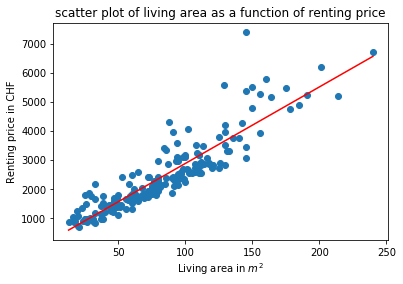

In [6]:
X = np.c_[np.ones(x.size), x]
Xt = np.transpose(X)

theta = np.dot(np.dot(np.linalg.inv(np.dot(Xt, X)), Xt), y)
print(theta)

def h(t, x):
    return t[0] + t[1] * x

plt.clf()
plt.scatter(x,y)
plt.title('scatter plot of living area as a function of renting price')
plt.xlabel('Living area in $m^2$')
plt.ylabel('Renting price in CHF')

xMax = max(x)
xMin = min(x)

plt.plot([xMin, xMax], [h(theta, xMin), h(theta, xMax)], color='red')

plt.show()

b) Compute the overall cost value according to Equation 2 (J(teta))

In [7]:
def J(t, x, y):
    
    result = 0
    for vx, vy in zip(x, y):
        j = h(theta, vx) - vy
        result += j * j
    return result/(2*len(x))

print('Cost J(teta):', J(theta, x, y))

Cost J(teta): 138034.95779787409


### Exercice 3 Batch gradient descent for linear regression

Implement the batch gradient descent algorithm for the previous problem. As seen in the theory,
the update rules are

**Remark** You need to iterate several times over the training set. If you have problems of convergence, you need to use a smaller value of α. Values such as 0.000001 are common.

a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe ?

The shape of the plot looks like a 1/x function, so after a good amount of steps the cost doesn't reduce much more and it becomes irrelevant to continue the process, thus the next question you aare asking, what would be a possible stopping criterion?

b) Imagine a stopping criterion, i.e. when do we stop iterating on the training set ?


We have multiples criteria possible, first we can put a limit on the difference between the cost of 2 iterations. For example, if the cost variation is under 0.5. But this implies often calculating the cost relay and calculating the cost is almost as expensive as calculating one more iteration in therm of CPU time. So another criteria could be to put a limit on the variation of theta values. For example if theta variation is under 0.0001%.

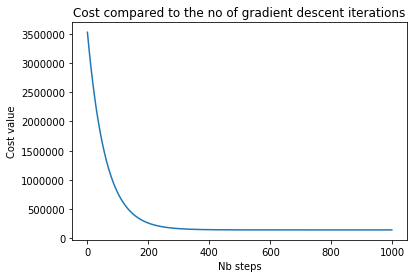

In [8]:
theta = [0, 0]
alpha = 0.000001
nbIter = 1000

def gradient_descent_step_t0(t, x, y):
    return sum([h(t, vx) - vy for vx, vy in zip(x, y)])/len(x)
def gradient_descent_step_t1(t, x, y):
    return sum([(h(t, vx) - vy) * vx for vx, vy in zip(x, y)])/len(x)

stepsCost = []

for i in range(nbIter):
    theta[0] -= alpha * gradient_descent_step_t0(theta, x, y)
    theta[1] -= alpha * gradient_descent_step_t1(theta, x, y)
    stepsCost.append(J(theta, x, y))


plt.clf()
plt.plot(range(0, len(stepsCost)), stepsCost)
plt.title('Cost compared to the no of gradient descent iterations')
plt.xlabel('Nb steps')
plt.ylabel('Cost value')
plt.show()

c) Plot the computed line hθ(x) on top of the scatter plot of exercise 1.

d) Compute the final cost value according to Equation 2 and compare it to the one of
exercise 2. What can you conclude ?

That the cost is close to the one obtained by the normal equation but since there is a matematical model to get the optimal values we can only approach it but we can't get the exact values.

In our point of view, the gradient descent is a good choice considering the huge amount of data (when matrix calculation becomes too expensive in term of CPU time) or when we get new references values continously. Or obviously when there is no defined mathematical model.

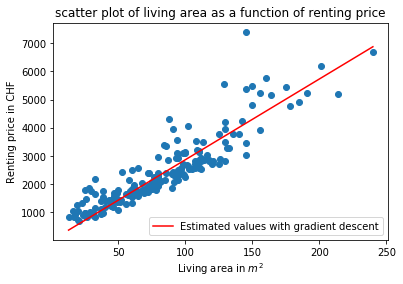

Cost : 144159.35282042885


In [12]:
plt.clf()
plt.scatter(x,y)
plt.title('scatter plot of living area as a function of renting price')
plt.xlabel('Living area in $m^2$')
plt.ylabel('Renting price in CHF')

xMax = max(x)
xMin = min(x)
# add the resulting equation to the plot
# sinci it's a stright line we use only 2 points
plt.plot([xMin, xMax], [h(theta, xMin), h(theta, xMax)], color='red', label='Estimated values with gradient descent')
plt.legend()
plt.show()

# Show the resulting cost 
print('Cost :', J(theta, x, y))



Exercice 4 Stochastic gradient descent for linear regression
Implement the stochastic gradient descent algorithm for the previous problem. As seen in the theory, the update rules are --equation n°8-

a) Plot the computed line hθ(x) on top of the scatter plot of exercise 1.

b) How many samples do you need to visit for reaching the convergence ?

According to our results, we realized that we need around 2 iterations on the complete dataset.

c) What kind of stopping criterion could we use here ?

We have to look at the general iterations of the whole dataset, but not just one modification of the theta varible. For example, we could calcule the cost difference when we step over 10% of the whole dataset.

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2 and 3. What can you conclude ?

The two results from exercice 3 and 4 are extremely close since they are both based on the gradient descent, whereas the one from exercice 2 differs a little more for the same reason as in ex 3. This is due to the fact that 3 and 4 are gradient descents and the non stochastic one is less sensitive to unexpected variables.

[0.3474831849926881, 28.747475121159276]


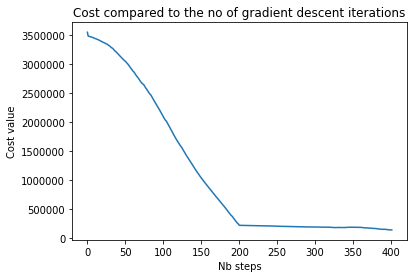

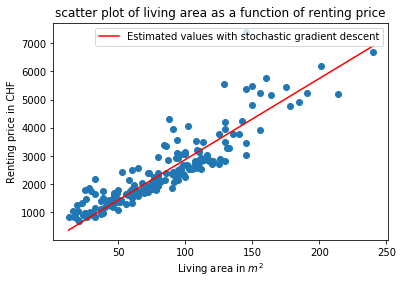

final cost: 144193.5424512259


In [16]:
theta = [0, 0]
alpha = 0.000001
#calculate values
costs = []
for i in range(2):
    for vx, vy in zip(x, y):
        theta[0] -=  alpha*(h(theta, vx)-vy)
        theta[1] -=  alpha*(h(theta, vx)-vy)*vx
        costs.append( J(theta, x, y))
       # print costs[len(costs) - 1]
    
 #   print J(theta, x, y)

print(theta)

plt.clf()
plt.plot(range(0, len(costs)), costs)
plt.title('Cost compared to the no of gradient descent iterations')
plt.xlabel('Nb steps')
plt.ylabel('Cost value')
plt.show()


plt.clf()
plt.scatter(x,y)
plt.title('scatter plot of living area as a function of renting price')
plt.xlabel('Living area in $m^2$')
plt.ylabel('Renting price in CHF')

xMax = max(x)
xMin = min(x)
# add the resulting equation to the plot
# since it's a straight line we use only 2 points
plt.plot([xMin, xMax], [h(theta, xMin), h(theta, xMax)], color='red', label='Estimated values with stochastic gradient descent')
plt.legend()
plt.show()

print('final cost:', costs[len(costs) - 1])


    